# Boom_Bike_Sharing_Assignment

# Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### The company wants to know:
 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands.

### Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


## 📚 Importing Necessary Libraries:

In [1]:
# Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing sicket learn packages for splitting the data into train, test, to encode categorical variables, to scale the features
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

# For implementing linear regression
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# For metric to evaluate the models
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## ⚠️Supress Warnings:

In [2]:
import warnings
warnings.filterwarnings('ignore')

## ⚙️Environment Settings

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## 📝🧠 Reading the Dataset & Understanding of the Data

In [4]:
# Loading the data.
boom_df = pd.read_csv('Day.csv')

In [5]:
# Checking the data.
boom_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Checking the Shape of the DataFrame
print('(No. of rows, No. of columns):', boom_df.shape)

(No. of rows, No. of columns): (730, 16)


In [7]:
# Getting the information about the DataFrame
boom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Generating descriptive statistics of the DataFrame. 
# It summarizes the central tendency, dispersion and shape of the dataset's distribution, excluding NaN values.
boom_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.995890,2.000339,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.690411,0.462641,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [9]:
# Checking for null values if any
boom_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# Checking for duplicates if any
boom_df.drop_duplicates(subset=None,inplace=True)

In [11]:
# Rechecking the Shape of the DataFrame
print('(No. of rows, No. of columns):', boom_df.shape)

(No. of rows, No. of columns): (730, 16)


## Observations:
 - No null values have been found. Hence, it's clean.
 - No duplicates have been found.
 - The datatypes of all the columns except dteday column(datatype i object) are int or float. So, Type conversion is needed  for dteday column.
 - Few columns are categorial and have integer datatype. Hence, we have to inspect them further to check whether they are to be converted to dummy variables or not.
 - Minimum value of humidity is 0, which is practically impossible.

In [12]:
boom_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##  🛃 Feature Extraction

In [13]:
# Let's keep a copy of the dataframe for making changes.
boom_df1 = boom_df.copy()

In [14]:
boom_df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Dropping unwanted columns:
 - instant: It's just an index variable. It doesn't play a significant role in model building. So, let's drop it.
 - dteday: We already have year, month & weekday columns. So, dropping dteday column doesn't affect much.
 - cnt: Here, cnt = casual + registered. So, let's drop casual and registered columns also.

In [15]:
# Now, let's prepare a list of these unwanted variables.
drop_list = ['instant', 'dteday', 'casual', 'registered']

In [16]:
# Dropping the unnessary columns
boom_df1.drop(drop_list, axis=1, inplace = True)

In [17]:
# Checking the dataframe after dropping the unnecessary columns
boom_df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
boom_df1.shape

(730, 12)

In [19]:
## Segregating the columns into Categorical and Numeric columns.
cat_vars = ['season', 'weekday', 'holiday', 'workingday', 'weathersit', 'yr', 'mnth']
cont_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [20]:
# Changing the datatype of categorical variables into 'category'
boom_df1[cat_vars]=boom_df1[cat_vars].astype('category')

In [21]:
boom_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 40.6 KB


In [22]:
# Checking the values for mnth column
boom_df1.mnth.value_counts().sort_values()

2     56
4     60
6     60
9     60
11    60
1     62
3     62
5     62
7     62
8     62
10    62
12    62
Name: mnth, dtype: int64

In [23]:
# Checking the values for weekday column
boom_df1.weekday.value_counts().sort_values()

0    104
3    104
4    104
5    104
6    104
1    105
2    105
Name: weekday, dtype: int64

In [24]:
# Mapping the numerical values back to their categorical values for weekday and mnth columns
boom_df1['weekday'] = boom_df1['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
boom_df1['mnth'] = boom_df1['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'})
boom_df1['season'] = boom_df1['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [25]:
boom_df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Outlier Analysis

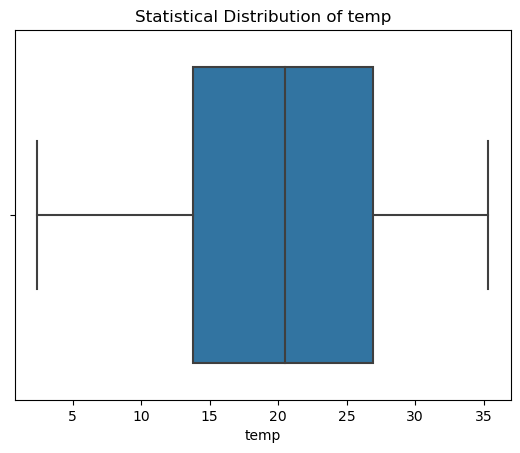

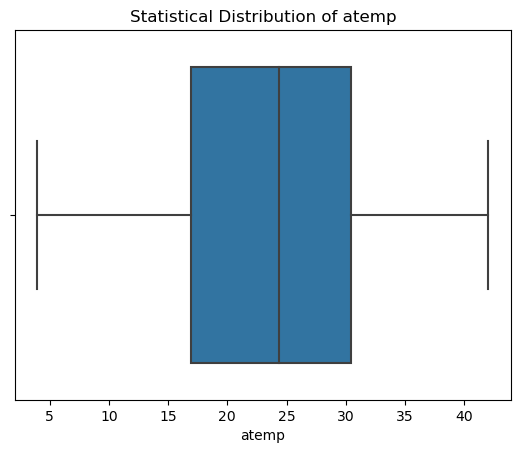

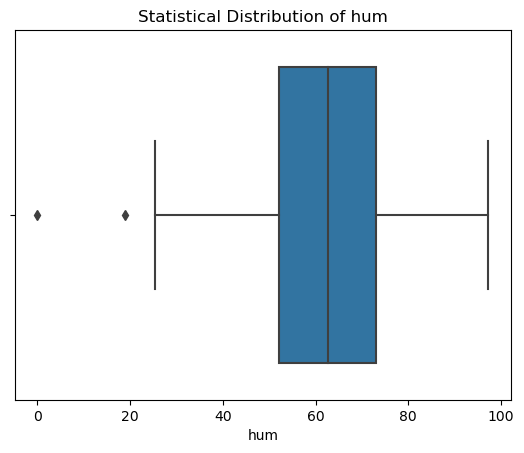

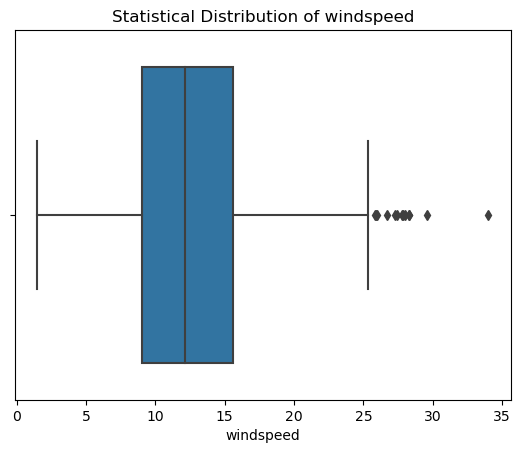

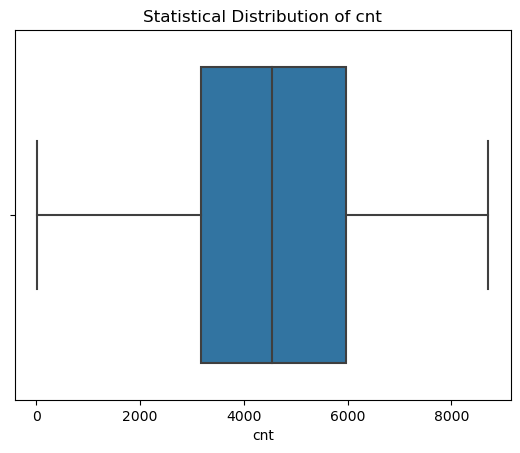

In [26]:
cont_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
for i in cont_vars:
    sns.boxplot(boom_df1[i])
    plt.xlabel(i)
    plt.title("Statistical Distribution of "+i)
    plt.show()

## Observations:
 - Humidity and Windspeed have outliers.

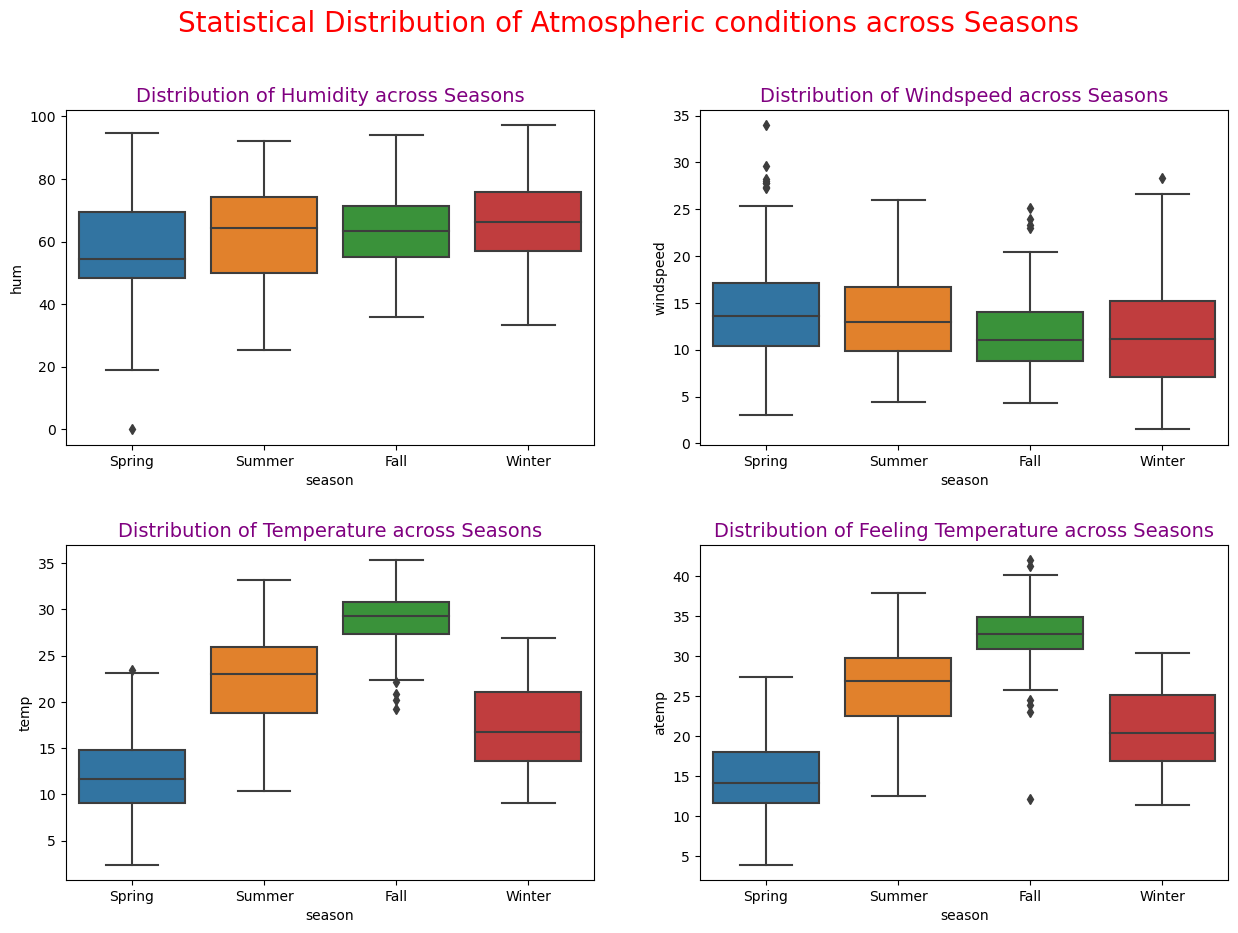

In [27]:
# Checking Statistical distribution of numeric columns with seasons.
plt.figure(figsize=[15,10])
plt.suptitle("Statistical Distribution of Atmospheric conditions across Seasons", fontsize = 20, fontweight = 20, color = 'red')
plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.subplot(2,2,1)
sns.boxplot(data=boom_df1,x='season',y='hum')
plt.title("Distribution of Humidity across Seasons", fontdict={'fontsize' : 14, 'fontweight' : 10, 'color' : 'purple'})
plt.subplot(2,2,2)
sns.boxplot(data=boom_df1,x='season', y='windspeed')
plt.title("Distribution of Windspeed across Seasons", fontdict={'fontsize' : 14, 'fontweight' : 10, 'color' : 'purple'})
plt.subplot(2,2,3)
sns.boxplot(data=boom_df1,x='season',y='temp')
plt.title("Distribution of Temperature across Seasons", fontdict={'fontsize' : 14, 'fontweight' : 10, 'color' : 'purple'})
plt.subplot(2,2,4)
sns.boxplot(data=boom_df1,x='season',y='atemp')
plt.title("Distribution of Feeling Temperature across Seasons", fontdict={'fontsize' : 14, 'fontweight' : 10, 'color' : 'purple'})
plt.show()

## Inferences:
 - Humidity has an outlier at 0, which is impossible
 - Windspeed has outliers in spring, fall and winter seasons.
 - Temperature has outliers in fall and spring seasons.
 - Feeling Temperature also has outliers in fall and spring seasons.

In [28]:
# Now, let's check even the no of records with 0 humidity value
boom_df1[boom_df1['hum']==0]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
68,Spring,0,Mar,0,Sat,0,3,15.952731,19.2834,0.0,17.545759,623


In [29]:
# Getting the mean humidity value for spring season
mean_val=boom_df1.groupby(by=['season'])['hum'].mean()['Spring']
mean_val

58.16702444444444

In [30]:
# Imputing the zero humidity value with the mean humidity value for spring season
boom_df1.loc[(boom_df1['season']=="Spring")&(boom_df1['hum']==0),'hum']=mean_val

In [31]:
# Now, let's re-check even the no of records with 0 humidity value
boom_df1[boom_df1['hum']==0]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt


# 📶Exploratory Data Analysis

## Pairplots to check the relationship b/w Numeric Variables

<Figure size 1500x3000 with 0 Axes>

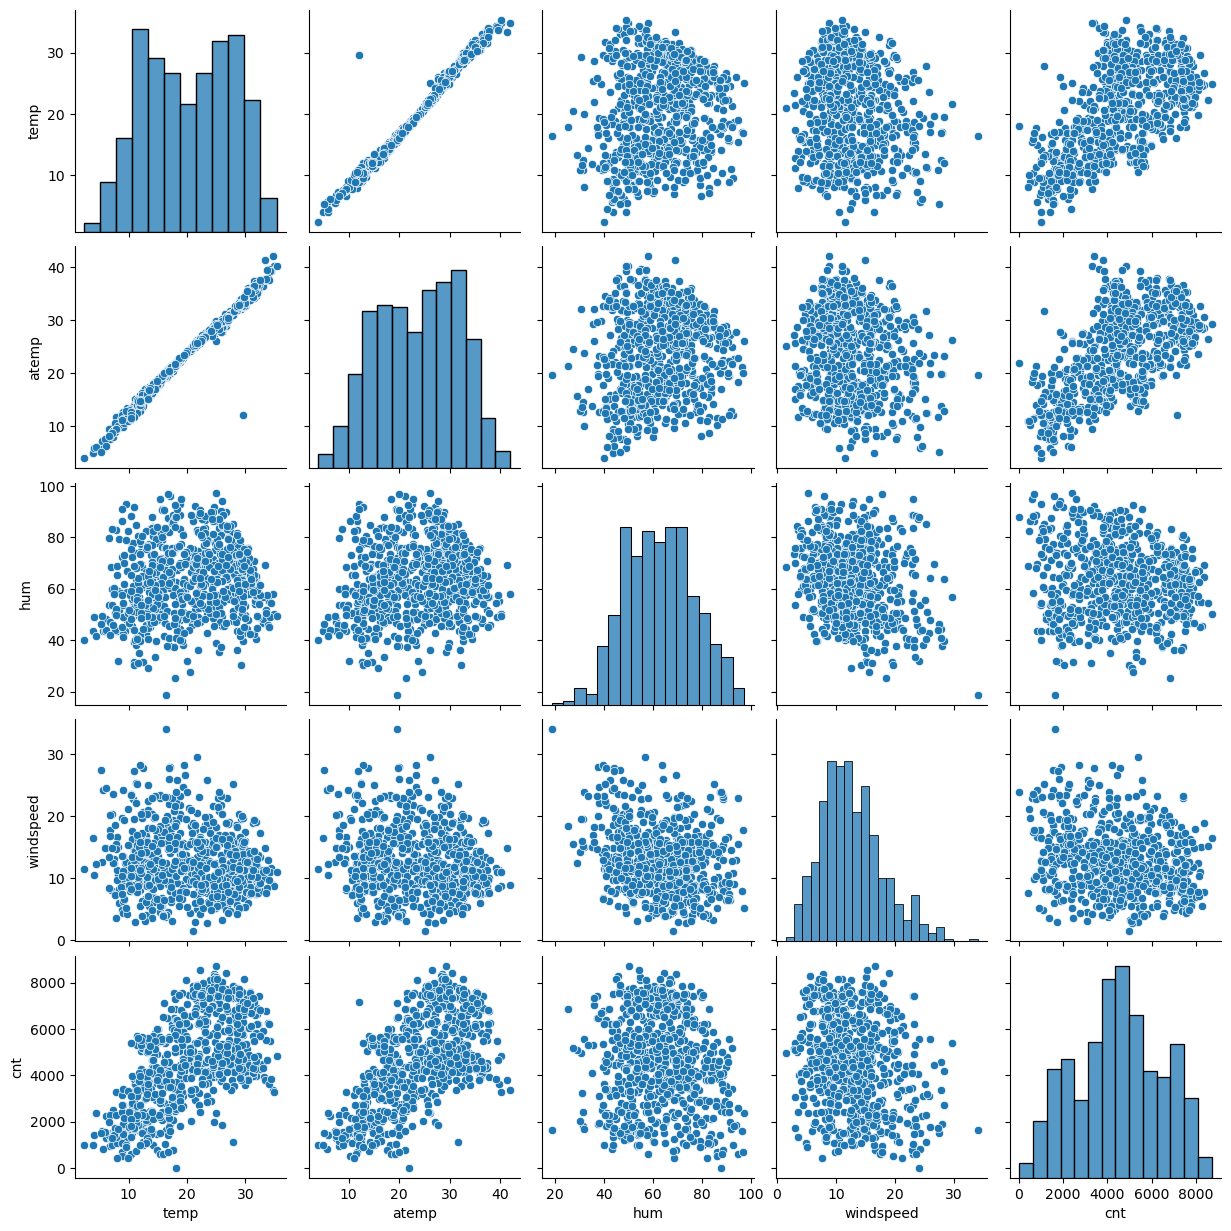

In [32]:
cont_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
plt.figure(figsize = (15,30))
sns.pairplot(boom_df1[cont_vars])
plt.show()

## Inferences:
 - Temperature and Feeling temperature have high correlation with each other.
 - Temperature and feeling temperature have the same correlation with the target variable (count).
 - We don't get any specific inferences about Humidity & Windspeed on just visualising the data.

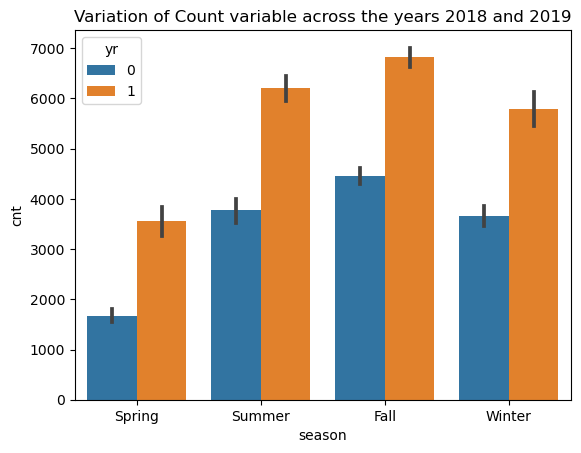

In [33]:
sns.barplot(boom_df1['season'], boom_df1['cnt'], boom_df1['yr'])
plt.title('Variation of Count variable across the years 2018 and 2019')
plt.show()
# We can notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively.

## Inferences:
 - Booking count is the highest in Fall season and the least in Spring season
 - Booking count is more in 2019 than that in 2018. So, we can find increasing booking count year by year.

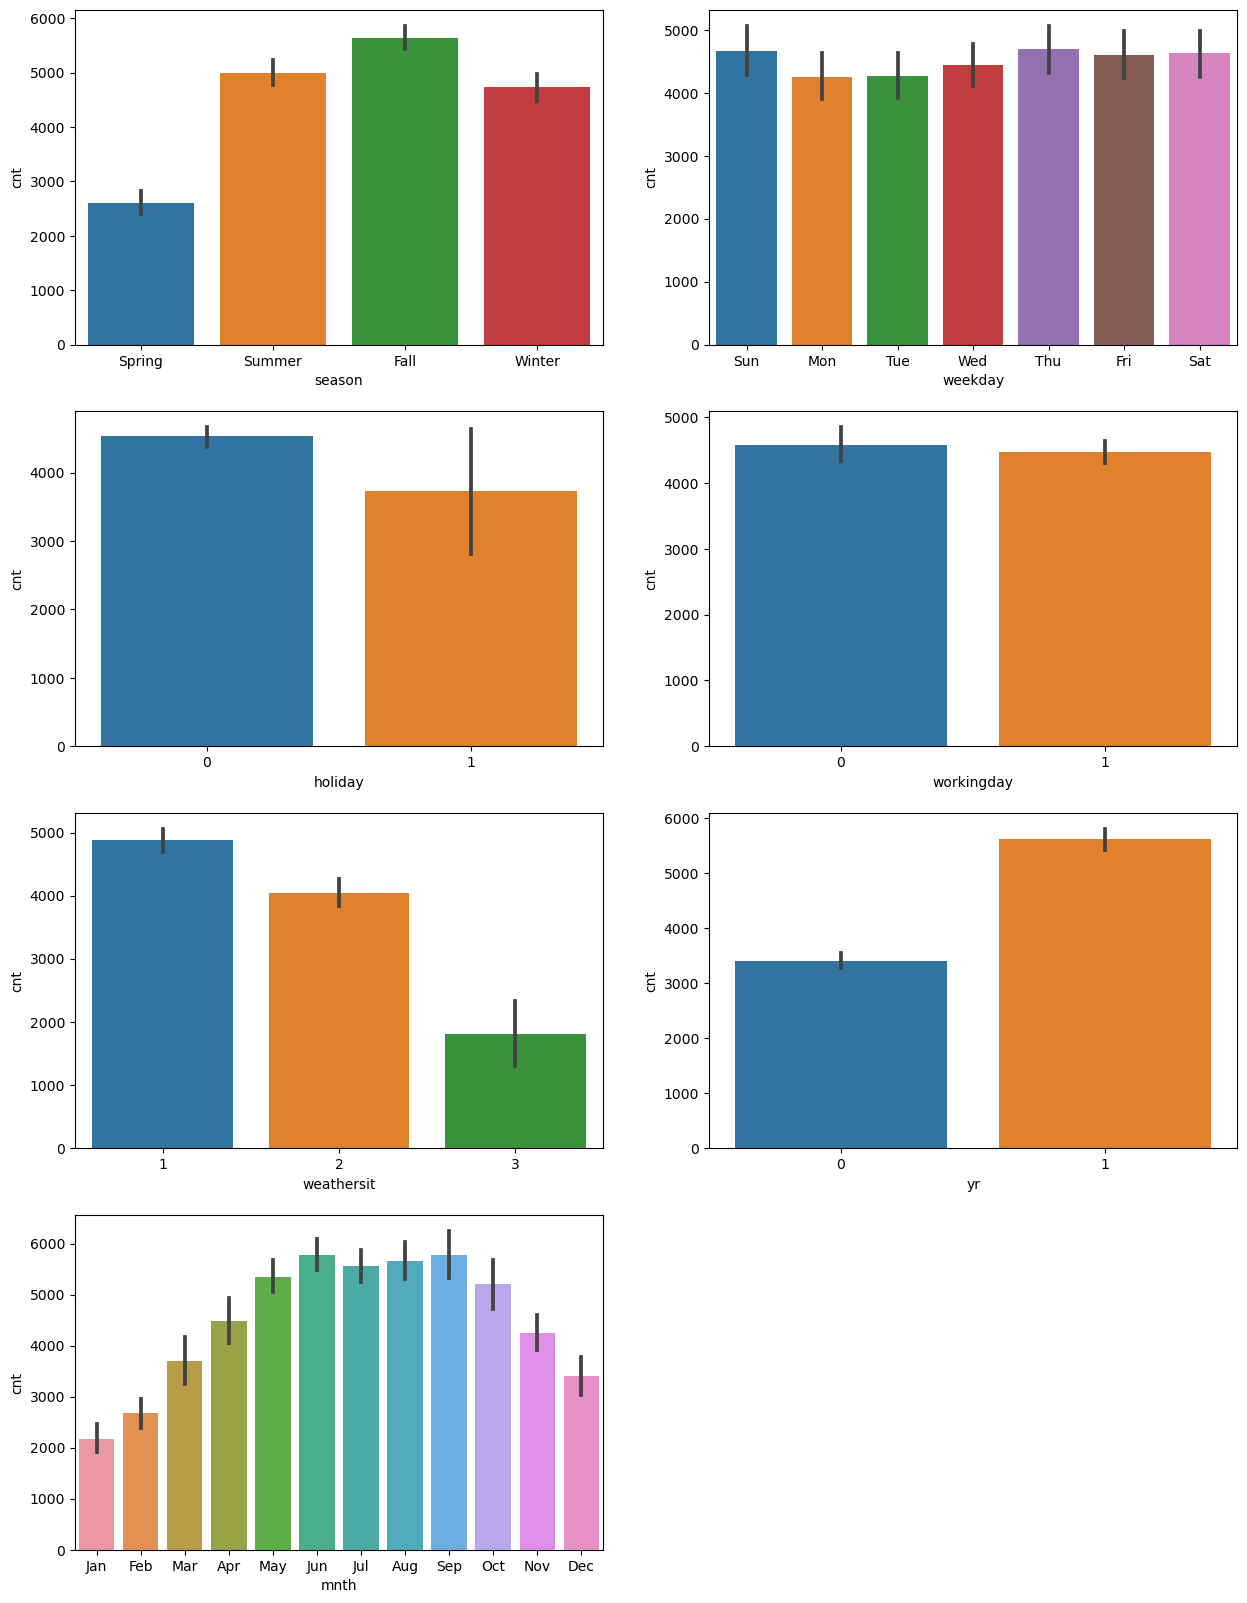

In [34]:
plt.figure(figsize=(15, 20))
plt.subplot(4,2,1)
sns.barplot(x = 'season', y = 'cnt', data = boom_df1)
plt.subplot(4,2,2)
sns.barplot(x = 'weekday', y = 'cnt', data = boom_df1)
plt.subplot(4,2,3)
sns.barplot(x = 'holiday', y = 'cnt', data = boom_df1)
plt.subplot(4,2,4)
sns.barplot(x = 'workingday', y = 'cnt', data = boom_df1)
plt.subplot(4,2,5)
sns.barplot(x = 'weathersit', y = 'cnt', data = boom_df1)
plt.subplot(4,2,6)
sns.barplot(x = 'yr', y = 'cnt', data = boom_df1)
plt.subplot(4,2,7)
sns.barplot(x = 'mnth', y = 'cnt', data = boom_df1)
plt.show()

## Inferences:
 - As we discussed earlier, Booking count has increased significantly in 2019 compared to 2018.
 - Count reduced during holidays.
 - Count was higher during May to October months. 
 - Count was higher in fall(Autumn) season followed by Summer.
 - Count was higher on Clear, Few clouds, Partly cloudy days followed by Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist days. No records were found for Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog weather.

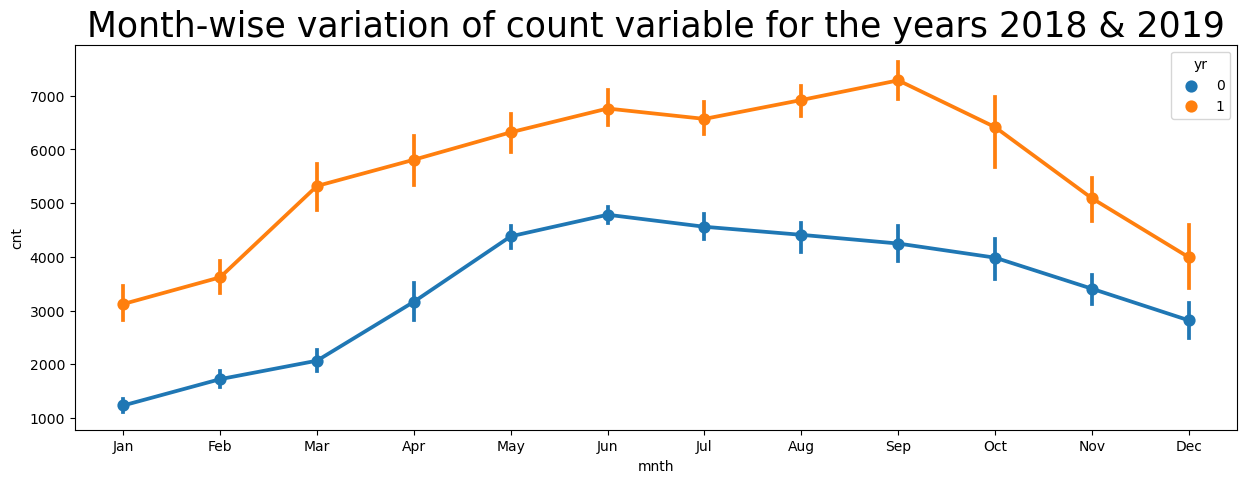

In [35]:
# Visualizing the variation of count variable per month for the years 2018 and 2019
plt.figure(figsize=[15,5])
plt.title("Month-wise variation of count variable for the years 2018 & 2019", fontsize=25)
sns.pointplot(data=boom_df1,x='mnth',y='cnt',hue='yr')
plt.show()

## Inferences:
 - Count was higher during May to October months in both the years with some irregular trends. 

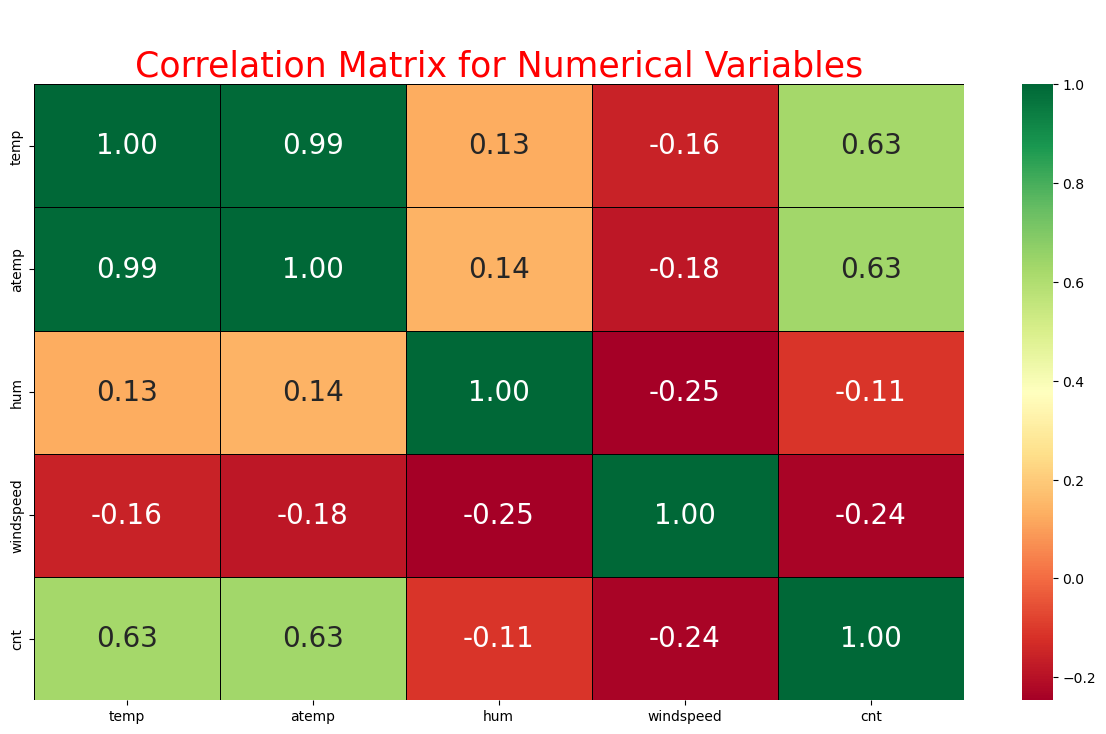

In [36]:
# Checking correlation between variables
plt.figure(figsize=[15,8])
sns.heatmap(boom_df1.corr(),annot=True,cmap='RdYlGn',fmt=".2f", annot_kws = {'size':20, 'fontweight': 40}, linewidth = 0.5, linecolor ='black')
plt.title("\nCorrelation Matrix for Numerical Variables", fontsize = 25, fontweight = 20, color = 'red')
plt.show()

## Inferences:
 - Temperature and Feeling temperature have extremely high correlation with each other.
 - Temperature and Feeling temperature have the same correlation with target variable(cnt). So, we can drop one of them(atemp variable) can be dropped.

In [37]:
# Dropping 'atemp' variable as it has very high correlation with temp
boom_df1.drop('atemp',axis=1,inplace=True)

In [38]:
# Checking columns after dropping 'atemp' variable
boom_df1.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [39]:
# Now, let's create a list of dummy variables
dummy_list = ['mnth','weathersit','weekday','season']

In [40]:
# Fall season is important as it has the highest amount of bookings. So to avoid the danger of dropping Fall, let's encode it seperately
# Encoding 3 variables, weekday, weathersit, mnth
wwm_dummy_df = pd.get_dummies(boom_df1[['weekday', 'weathersit', 'mnth']], drop_first=True)

# Now, encoding season
season_dummy_df = pd.get_dummies(boom_df1['season'])
season_dummy_df = season_dummy_df[['Summer', 'Fall', 'Winter']] 

# Concatenating these 2 dataframes
dummy_df = pd.concat([wwm_dummy_df, season_dummy_df],axis=1)

In [41]:
dummy_df.head()

,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_2,weathersit_3,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,Summer,Fall,Winter
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
# Concatenating the dataframe with dummy variables with the original dataframe to get all the variables together
boom_df1=pd.concat([boom_df1,dummy_df],axis=1)
boom_df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_2,weathersit_3,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,Summer,Fall,Winter
0,Spring,0,Jan,0,Mon,1,2,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Spring,0,Jan,0,Tue,1,2,14.902598,69.6087,16.652113,801,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Spring,0,Jan,0,Wed,1,1,8.050924,43.7273,16.636703,1349,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Spring,0,Jan,0,Thu,1,1,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Spring,0,Jan,0,Fri,1,1,9.305237,43.6957,12.522300,1600,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# Dropping 'mnth','weathersit','season' and 'weekday' as we have created dummy variables for them.
boom_df1.drop(dummy_list, axis=1,inplace=True)

In [44]:
boom_df1.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_2,weathersit_3,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,Summer,Fall,Winter
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
boom_df1.shape

(730, 29)

# Feature Scaling

In [46]:
# Feature scaling must be done only after splitting the data into training and test setst
boom_df_train, boom_df_test=train_test_split(boom_df1, train_size=0.7, random_state=225)

In [47]:
# Let's check the shape of training dataset
boom_df_train.shape

(510, 29)

In [48]:
# Let's check the shape of testing dataset
boom_df_test.shape

(220, 29)

In [49]:
# Rescaling the training dataset
scaler=MinMaxScaler()
cont_vars1 = ['temp','hum', 'windspeed', 'cnt']
boom_df_train[cont_vars1]=scaler.fit_transform(boom_df_train[cont_vars1])
boom_df_train[cont_vars1].head()

,temp,hum,windspeed,cnt
713,0.341967,0.551624,0.200296,0.588890
441,0.533355,0.773782,0.249281,0.687917
397,0.438736,0.582947,0.393145,0.438181
636,0.623673,0.401972,0.489567,1.000000
528,0.769902,0.456496,0.765528,0.867104


In [50]:
# Checking the normalized training data
boom_df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_2,weathersit_3,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,Summer,Fall,Winter
713,1,0,0,0.341967,0.551624,0.200296,0.588890,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
441,1,0,1,0.533355,0.773782,0.249281,0.687917,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
397,1,0,0,0.438736,0.582947,0.393145,0.438181,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
636,1,0,0,0.623673,0.401972,0.489567,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
528,1,0,1,0.769902,0.456496,0.765528,0.867104,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [51]:
# Checking the summary of the normalized training data
boom_df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,510.0,0.562085,0.235657,0.0,0.362933,0.561848,0.770710,1.0
hum,510.0,0.519507,0.197425,0.0,0.367964,0.513921,0.662268,1.0
windspeed,510.0,0.403051,0.184486,0.0,0.273045,0.379812,0.497535,1.0
cnt,510.0,0.522565,0.223872,0.0,0.366167,0.530060,0.684665,1.0
weekday_Mon,510.0,0.145098,0.352545,0.0,0.000000,0.000000,0.000000,1.0
weekday_Tue,510.0,0.149020,0.356457,0.0,0.000000,0.000000,0.000000,1.0
weekday_Wed,510.0,0.139216,0.346511,0.0,0.000000,0.000000,0.000000,1.0
weekday_Thu,510.0,0.147059,0.354512,0.0,0.000000,0.000000,0.000000,1.0
weekday_Fri,510.0,0.141176,0.348545,0.0,0.000000,0.000000,0.000000,1.0
weekday_Sat,510.0,0.150980,0.358381,0.0,0.000000,0.000000,0.000000,1.0


In [52]:
# Dividing the training dataset into x & y variables
y_train = boom_df_train.pop('cnt')
x_train = boom_df_train

In [53]:
# Checking the x variable
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_2,weathersit_3,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,Summer,Fall,Winter
713,1,0,0,0.341967,0.551624,0.200296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
441,1,0,1,0.533355,0.773782,0.249281,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
397,1,0,0,0.438736,0.582947,0.393145,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
636,1,0,0,0.623673,0.401972,0.489567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
528,1,0,1,0.769902,0.456496,0.765528,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [54]:
# Checking the y variable
y_train.head()

713    0.588890
441    0.687917
397    0.438181
636    1.000000
528    0.867104
Name: cnt, dtype: float64

# Model Building
## Build a Model using RFE and Automated approach

In [55]:
# Let's use RFE for feature elimination
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [56]:
# Choosing 15 features using automated approach
rfe = RFE(estimator = lr, n_features_to_select =15)
rfe = rfe.fit(x_train, y_train)

In [57]:
# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=x_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')


,features,Feature Chosen,Ranking
0,yr,True,1
25,Summer,True,1
22,mnth_Oct,True,1
21,mnth_Sep,True,1
17,mnth_May,True,1
16,mnth_Apr,True,1
15,mnth_Mar,True,1
26,Fall,True,1
12,weathersit_2,True,1
13,weathersit_3,True,1


In [58]:
# Getting the columns chosen by RFE
rfe_col=x_train.columns[rfe.support_]
# Creating the independent variable dataset using these columns selected by RFE method.
x_train_rfe=x_train[rfe_col]

In [59]:
rfe_col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'weathersit_2',
       'weathersit_3', 'mnth_Mar', 'mnth_Apr', 'mnth_May', 'mnth_Sep',
       'mnth_Oct', 'Summer', 'Fall', 'Winter'],
      dtype='object')

In [60]:
x_train_rfe.shape

(510, 15)

### Re-usable function to build models using statsmodel api

In [61]:
def model_building(cols):
    x_train_sm = sm.add_constant(x_train[cols])
    lm = sm.OLS(y_train, x_train_sm).fit()
    print(lm.summary())
    return lm

### Re-usable function to calculate VIFs

In [62]:
def vif_calc(cols):
    df1 = x_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

## Model-1

In [63]:
model_building(rfe_col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.9
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          1.64e-187
Time:                        21:21:16   Log-Likelihood:                 512.32
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     494   BIC:                            -924.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2003      0.022      9.123   

In [64]:
vif_calc(rfe_col)

        Features    VIF
2           temp  22.04
3            hum  11.39
13          Fall   7.10
12        Summer   5.85
4      windspeed   4.42
14        Winter   2.97
5   weathersit_2   2.46
9       mnth_May   2.30
8       mnth_Apr   2.04
0             yr   1.96
11      mnth_Oct   1.58
7       mnth_Mar   1.41
6   weathersit_3   1.32
10      mnth_Sep   1.30
1        holiday   1.04


## Inferences from Model-1 :
 - temp: VIF= 22.04 which is the highest and more than 5. So, we can drop it.

In [65]:
# Dropping temp column
x_train_rfe.drop('temp',axis=1,inplace=True)

In [66]:
# Rechecking the columns
cols = x_train_rfe.columns
cols

Index(['yr', 'holiday', 'hum', 'windspeed', 'weathersit_2', 'weathersit_3',
       'mnth_Mar', 'mnth_Apr', 'mnth_May', 'mnth_Sep', 'mnth_Oct', 'Summer',
       'Fall', 'Winter'],
      dtype='object')

## Model-2

In [67]:
model_building(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     120.8
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          1.62e-149
Time:                        21:21:16   Log-Likelihood:                 418.93
No. Observations:                 510   AIC:                            -807.9
Df Residuals:                     495   BIC:                            -744.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3188      0.025     12.998   

In [68]:
vif_calc(cols)

        Features   VIF
2            hum  8.30
3      windspeed  4.00
11        Summer  3.85
13        Winter  2.64
12          Fall  2.33
8       mnth_May  2.29
4   weathersit_2  2.27
7       mnth_Apr  1.99
0             yr  1.86
10      mnth_Oct  1.55
6       mnth_Mar  1.40
9       mnth_Sep  1.30
5   weathersit_3  1.24
1        holiday  1.04


## Inferences from Model-2 :
 - hum : VIF= 8.30 which is the highest and more than 5. So, we can drop it.

In [69]:
# Dropping hum column
x_train_rfe.drop('hum',axis=1,inplace=True)

In [70]:
# Rechecking the columns
cols = x_train_rfe.columns
cols

Index(['yr', 'holiday', 'windspeed', 'weathersit_2', 'weathersit_3',
       'mnth_Mar', 'mnth_Apr', 'mnth_May', 'mnth_Sep', 'mnth_Oct', 'Summer',
       'Fall', 'Winter'],
      dtype='object')

## Model-3

In [71]:
model_building(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     127.9
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          5.21e-149
Time:                        21:21:17   Log-Likelihood:                 415.18
No. Observations:                 510   AIC:                            -802.4
Df Residuals:                     496   BIC:                            -743.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2726      0.018     15.376   

In [72]:
vif_calc(cols)

        Features   VIF
10        Summer  3.62
2      windspeed  3.46
7       mnth_May  2.22
12        Winter  2.11
6       mnth_Apr  1.99
0             yr  1.84
11          Fall  1.76
9       mnth_Oct  1.55
3   weathersit_2  1.49
5       mnth_Mar  1.38
8       mnth_Sep  1.27
4   weathersit_3  1.12
1        holiday  1.04


## Inferences from Model-3 :
 - mnth_Apr has the highest p value. Hence, we can drop it.

In [73]:
# Dropping mnth_Apr column
x_train_rfe.drop('mnth_Apr',axis=1,inplace=True)

In [74]:
# Rechecking the columns
cols = x_train_rfe.columns
cols

Index(['yr', 'holiday', 'windspeed', 'weathersit_2', 'weathersit_3',
       'mnth_Mar', 'mnth_May', 'mnth_Sep', 'mnth_Oct', 'Summer', 'Fall',
       'Winter'],
      dtype='object')

## Model-4

In [75]:
model_building(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.9
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          1.51e-149
Time:                        21:21:18   Log-Likelihood:                 413.89
No. Observations:                 510   AIC:                            -801.8
Df Residuals:                     497   BIC:                            -746.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2723      0.018     15.335   

vif_calc(cols)

## Inferences from Model-4 :
 - mnth_Mar and holiday have the highest p-value. Let's drop mnth_Mar.

In [76]:
# Dropping mnth_Mar column
x_train_rfe.drop('mnth_Mar',axis=1,inplace=True)

In [77]:
# Rechecking the columns
cols = x_train_rfe.columns
cols

Index(['yr', 'holiday', 'windspeed', 'weathersit_2', 'weathersit_3',
       'mnth_May', 'mnth_Sep', 'mnth_Oct', 'Summer', 'Fall', 'Winter'],
      dtype='object')

## Model-5

In [78]:
model_building(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     148.7
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          1.69e-149
Time:                        21:21:18   Log-Likelihood:                 411.17
No. Observations:                 510   AIC:                            -798.3
Df Residuals:                     498   BIC:                            -747.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2810      0.017     16.128   

In [79]:
vif_calc(cols)

        Features   VIF
2      windspeed  3.04
8         Summer  2.24
10        Winter  2.03
0             yr  1.84
9           Fall  1.67
5       mnth_May  1.58
7       mnth_Oct  1.55
3   weathersit_2  1.48
6       mnth_Sep  1.27
4   weathersit_3  1.12
1        holiday  1.04


## Inferences from Model-5:
 - holiday has the highest p-value. Let's drop it.

In [80]:
# Dropping holiday column
x_train_rfe.drop('holiday',axis=1,inplace=True)

In [81]:
# Rechecking the columns
cols = x_train_rfe.columns
cols

Index(['yr', 'windspeed', 'weathersit_2', 'weathersit_3', 'mnth_May',
       'mnth_Sep', 'mnth_Oct', 'Summer', 'Fall', 'Winter'],
      dtype='object')

## Model-6

In [82]:
model_building(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          2.82e-149
Time:                        21:21:19   Log-Likelihood:                 408.00
No. Observations:                 510   AIC:                            -794.0
Df Residuals:                     499   BIC:                            -747.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2788      0.017     15.939   

In [83]:
vif_calc(cols)

       Features   VIF
1     windspeed  2.99
7        Summer  2.23
9        Winter  2.03
0            yr  1.84
8          Fall  1.67
4      mnth_May  1.58
6      mnth_Oct  1.55
2  weathersit_2  1.48
5      mnth_Sep  1.27
3  weathersit_3  1.12


## Inferences from Model-6:
 - mnth_May has the highest p-value. Let's drop it.

In [84]:
# Dropping mnth_May column
x_train_rfe.drop('mnth_May',axis=1,inplace=True)

In [85]:
# Rechecking the columns
cols1 = x_train_rfe.columns
cols1

Index(['yr', 'windspeed', 'weathersit_2', 'weathersit_3', 'mnth_Sep',
       'mnth_Oct', 'Summer', 'Fall', 'Winter'],
      dtype='object')

## Model-7

In [86]:
model_building(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          2.82e-149
Time:                        21:21:19   Log-Likelihood:                 408.00
No. Observations:                 510   AIC:                            -794.0
Df Residuals:                     499   BIC:                            -747.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2788      0.017     15.939   

In [87]:
vif_calc(cols)

       Features   VIF
1     windspeed  2.99
7        Summer  2.23
9        Winter  2.03
0            yr  1.84
8          Fall  1.67
4      mnth_May  1.58
6      mnth_Oct  1.55
2  weathersit_2  1.48
5      mnth_Sep  1.27
3  weathersit_3  1.12


## Inferences:
 - Here, VIF seems to be almost accepted. 
 - p-value for all the features is almost 0.000 and R-squared is 0.764.
 - Let's select Model-7 as our final as it has all the important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multicoliinear (high VIF) variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [88]:
#Build a model with all columns to select features automatically
def final_model(x,y):
    lr1 = LinearRegression()
    lr1.fit(x,y)
    return lr1

In [89]:
cols1

Index(['yr', 'windspeed', 'weathersit_2', 'weathersit_3', 'mnth_Sep',
       'mnth_Oct', 'Summer', 'Fall', 'Winter'],
      dtype='object')

In [90]:
# Let's build the final model with the above columns
lr = final_model(x_train[cols1],y_train)

In [91]:
lr.intercept_

0.28186234407913735

## Model Evaluation

### Residual Analysis

In [92]:
# Predicting the values of the dependent variable using the model
y_train_pred = lr.predict(x_train[cols1])

In [93]:
# Calculating residual
residual = y_train - y_train_pred

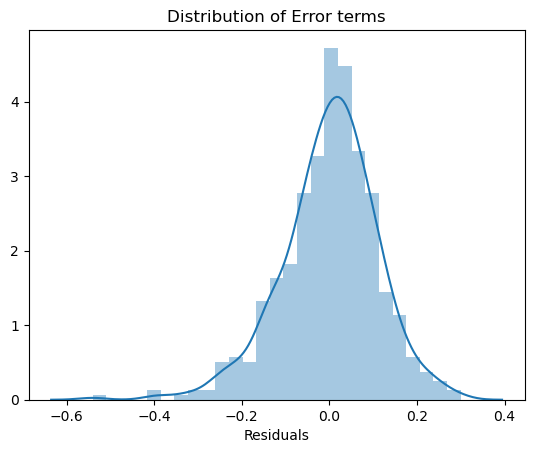

In [94]:
# Plotting the residual
plt.title("Distribution of Error terms")
sns.distplot(residual)
plt.xlabel("Residuals")
plt.ylabel("")
plt.show()

## Inferences:
 - Error is normally distributed across 0 which indicates that our model has handled the assumption of Error Normal Distribution properly.

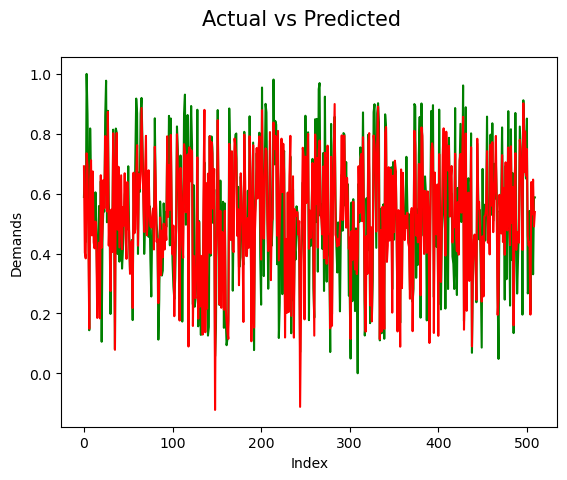

In [95]:
# Checking the Homoscedasticity property by plotting the predicted points vs Actual points
c = [i for i in range(0,len(x_train),1)]
plt.plot(c,y_train, color="green")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

## Inferences:
 - Actual and Predicted results follow almost the same pattern.

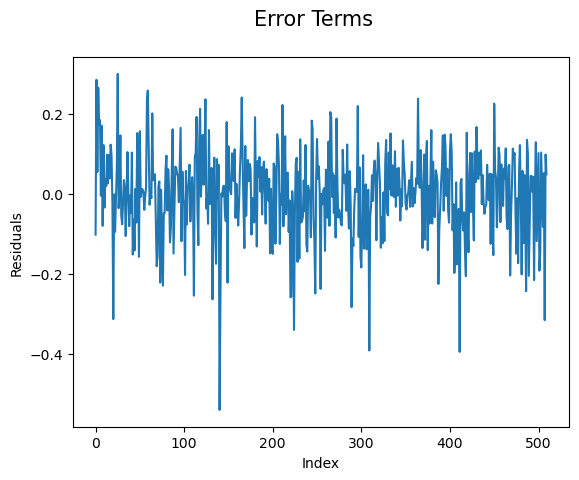

In [96]:
# Error Terms
c = [i for i in range(0,len(x_train),1)]
plt.plot(c,residual)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

## Inference:
 - Error terms are independent of each other.

## Linearity Check

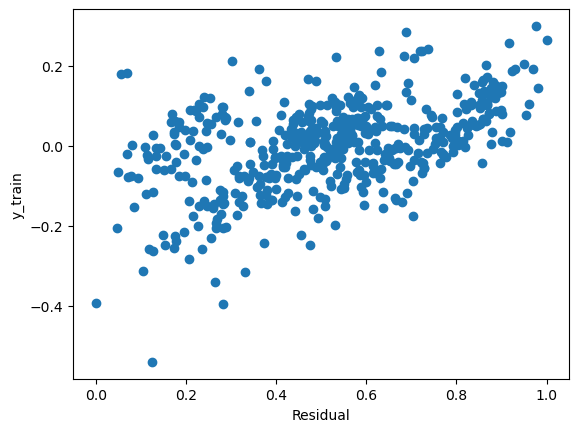

In [97]:
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [98]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7606253791451758

## Inference:
 - R-Squared is the same as we got from our final model.

In [99]:
# Transforming the test data
boom_df_test[cont_vars1]=scaler.transform(boom_df_test[cont_vars1])

In [100]:
# Checking the summary of the testing data
boom_df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,220.0,0.565616,0.238092,0.048245,0.355406,0.574213,0.767215,1.035482
hum,220.0,0.524600,0.191546,-0.092227,0.392691,0.528132,0.662123,0.940835
windspeed,220.0,0.396423,0.186550,0.047504,0.259637,0.364235,0.512205,1.157215
cnt,220.0,0.533049,0.234076,0.090589,0.373374,0.532052,0.727939,1.018634
weekday_Mon,220.0,0.140909,0.348721,0.000000,0.000000,0.000000,0.000000,1.000000
weekday_Tue,220.0,0.131818,0.339064,0.000000,0.000000,0.000000,0.000000,1.000000
weekday_Wed,220.0,0.150000,0.357886,0.000000,0.000000,0.000000,0.000000,1.000000
weekday_Thu,220.0,0.131818,0.339064,0.000000,0.000000,0.000000,0.000000,1.000000
weekday_Fri,220.0,0.145455,0.353363,0.000000,0.000000,0.000000,0.000000,1.000000
weekday_Sat,220.0,0.122727,0.328872,0.000000,0.000000,0.000000,0.000000,1.000000


In [101]:
# Dividing it into x_test and y_test
y_test=boom_df_test.pop('cnt')
x_test=boom_df_test

In [102]:
# Adding the columns used in the final model in a list
final_cols=x_train_rfe.columns
final_cols

Index(['yr', 'windspeed', 'weathersit_2', 'weathersit_3', 'mnth_Sep',
       'mnth_Oct', 'Summer', 'Fall', 'Winter'],
      dtype='object')

In [103]:
# Filtering the test data on the basis of columns used in the final model
x_test=x_test[final_cols]
x_test_constn=sm.add_constant(x_test)

In [104]:
# Columns from our final model
cols1

Index(['yr', 'windspeed', 'weathersit_2', 'weathersit_3', 'mnth_Sep',
       'mnth_Oct', 'Summer', 'Fall', 'Winter'],
      dtype='object')

In [105]:
#Predict the values for test data
y_test_pred = lr.predict(x_test[cols1])

## R-Squared value for test predictions

In [106]:
# Let's find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.780964942865157

## Inference
 - R-Squared value for predictions on test data (0.781) is almost same as R-Squared value of train data(0.761). 

## Homoscedacity

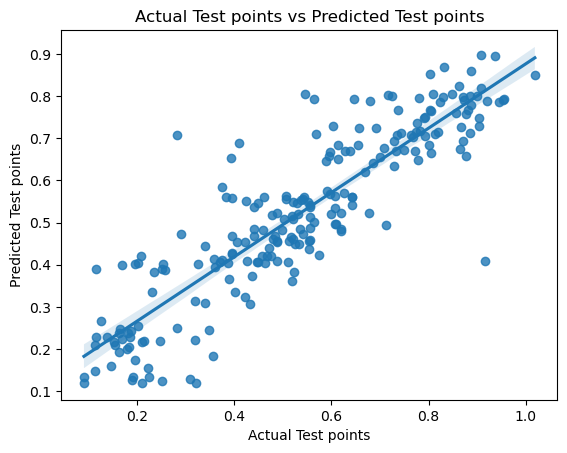

In [107]:
# Plotting the predicted test points with the actual test points
plt.title("Actual Test points vs Predicted Test points")
sns.regplot(y_test, y_test_pred)
plt.xlabel("Actual Test points")
plt.ylabel("Predicted Test points")
plt.show()

# Inference:
 - Error terms do not vary much as the value of the predictor variable changes.

In [108]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def act_vs_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="purple", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)           
    plt.xlabel('Index', fontsize=18)                              
    plt.ylabel('Counts', fontsize=16) 

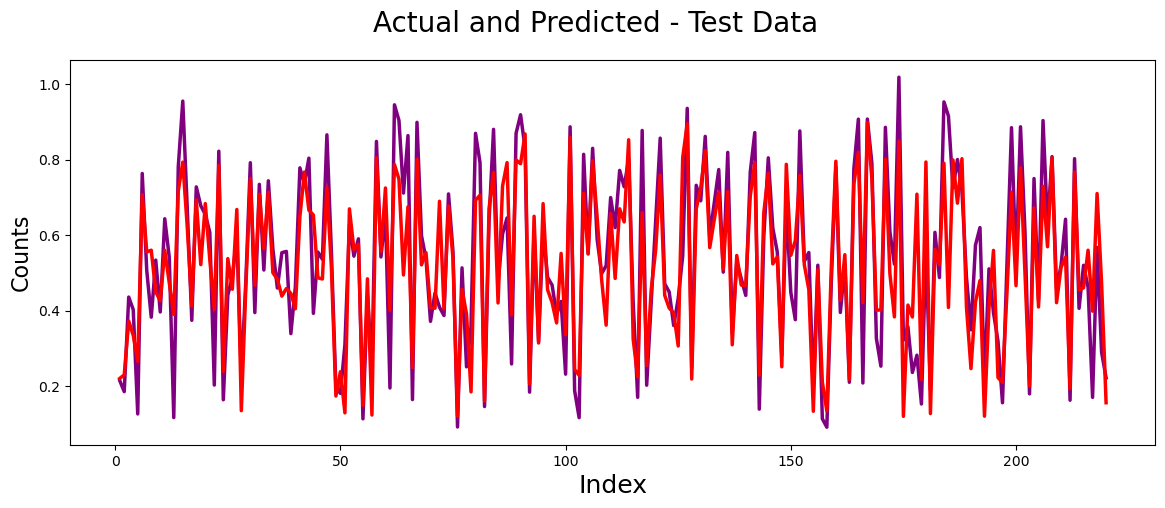

In [109]:
act_vs_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

## Inferences:
 - Actual and Predicted results follow almost the same pattern for even the Test Data

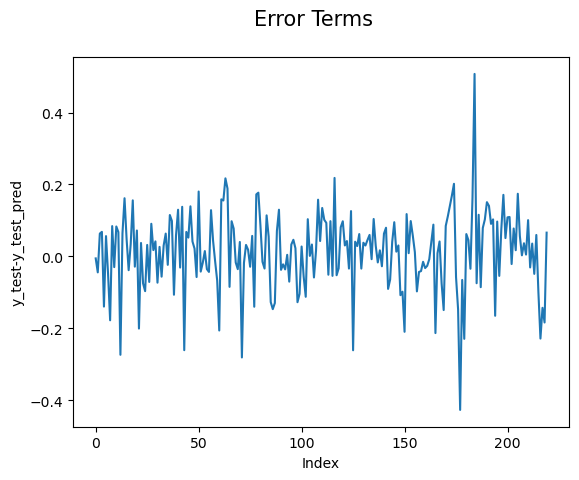

In [110]:
# Plotting the Error Terms
c = [i for i in range(0,len(x_test),1)]
plt.plot(c,y_test-y_test_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_test-y_test_pred')
plt.show()

## Inference:
 - As we can see the error terms are randomly distributed and there is no pattern. 
 - So, we can say that the output is explained well by the model and there are no other parameters that can explain the model better.

# Final Inferences:

### After analysing the above model, the comapany should focus on the following features:


 - Company should focus on expanding business during September.
 - Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
 - There would be less bookings during Light Snow or Rain, they could probably plan accordingly.
#### Top 3 features after building the model are:
 - Season_fall - A coefficient value of ‘0.3129’ indicated that a unit increase in temp variable increases the bike hire count by 0.3129 units.
 - Season Summer - A coefficient value of ‘0.2713’ indicates that a unit increase in yr variable increases the bike hire count by 0.2713 units.
 - Bad weather conditions may decrease the booking count.

## Conclusion:
### Significant variables to predict the demand for shared bikes
 
 - Season
 - months(January, July, September, November, December)
 - Year (2019)
 - Sunday
 - weathersit( Light Snow, Mist + Cloudy)
 - holiday
 - temp
 - hum
 - windspeed

# 🙏Thank you🙏

#####                                                          submitted by Devi Mullapudi